In [ ]:
# Import Dependencies 

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [106]:
nasdaq = pd.read_csv('final-model-data.csv')

In [107]:
nasdaq.head()

,Symbol,Date,Open,High,Low,Close,Volume
0,AACG,17-Oct-19,1.83,1.8708,1.83,1.84,5300
1,AACG,18-Oct-19,1.85,1.85,1.7688,1.7701,12800
2,AACG,21-Oct-19,1.75,1.8869,1.75,1.8201,15700
3,AACG,22-Oct-19,1.79,1.82,1.78,1.78,24800
4,AACG,23-Oct-19,1.76,1.8578,1.76,1.8299,6500


In [108]:
# Change the Close column to Float

In [109]:
nasdaq_2 = nasdaq[nasdaq['Close']!= 'Close']

In [110]:
nasdaq_2['Close2'] = nasdaq_2['Close'].astype(float)

In [111]:
for c_value in nasdaq['Close']:
    if (type(c_value)== str):
        print(c_value)

25.35
25.72
25.5
25.65
25.66
25.86
26.06
26.08
26.073
26.12
26.2
26.17
26.43
26.25
25.95
25.77
25.6
25.43
25.43
25.48
25.54
25.66
25.68
25.52
25.51
25.6
25.69
25.97
25.62
25.55
25.62
25.48
25.64
25.57
25.6
25.655
25.56
25.56
25.56
25.48
25.05
25.09
25.39
25.3814
25.535
25.67
25.78
25.65
25.56
26
25.81
25.85
26.15
26.1
25.98
25.93
25.84
25.84
25.98
25.98
25.98
25.87
17.56
17.57
17.59
17.59
17.57
17.59
17.6
17.63
17.64
17.655
17.6
17.59
17.61
17.605
17.6
17.6
17.6
17.61
17.6
17.64
17.62
17.61
17.63
17.635
17.62
17.57
17.57
17.56
17.55
17.52
17.5
17.51
17.45
17.38
17.36
17.395
17.4
17.39
17.4
17.38
17.42
17.41
17.41
17.41
17.42
17.42
17.41
17.42
17.46
17.44
17.45
17.47
17.5
17.51
17.48
17.49
17.51
17.47
17.45
17.43
17.45
17.44
17.44
17.44
17.43
17.45
17.43
17.41
17.39
17.39
17.37
17.33
17.33
17.31
17.33
17.3101
17.3
17.27
17.29
17.31
17.35
17.33
17.34
17.33
17.34
17.34
17.34
17.335
17.32
17.34
17.35
17.34
17.36
17.35
17.38
17.3769
17.39
17.3916
17.37
17.365
17.36
17.35
17.345
17.355
17.35

In [112]:
nasdaq_2.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'], inplace=True)
nasdaq_2.tail()

,Symbol,Date,Close2
947076,TRUE,20-Jul-20,2.985
947077,TRUE,21-Jul-20,2.950
947078,TRUE,22-Jul-20,2.950
947079,TRUE,23-Jul-20,2.935
947080,TRUE,24-Jul-20,2.870


In [113]:
nasdaq_2.set_index(['Symbol', 'Date'], inplace =True)


In [114]:
nasdaq_2 = nasdaq_2.groupby('Symbol').pct_change()

In [115]:
nasdaq_2.head()

Close2
Symbol Date               
AACG   17-Oct-19       NaN
       18-Oct-19 -0.037989
       21-Oct-19  0.028247
       22-Oct-19 -0.022032
       23-Oct-19  0.028034

In [116]:
nasdaq_2 = nasdaq_2.dropna()

In [117]:
nasdaq_2 = nasdaq_2.rename(columns={'Close2': 'Returns'})

In [118]:
nasdaq_2 = nasdaq_2.sort_values('Date')

In [119]:
nasdaq_2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 943004 entries, ('SCHN', '1-Apr-20') to ('DOMO', '9-Sep-19')
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Returns  943004 non-null  float64
dtypes: float64(1)
memory usage: 10.8+ MB


In [ ]:
#nasdaq = pd.read_csv('final-model-data.csv')

In [ ]:
#nasdaq.drop(columns=['Open', 'High', 'Low', 'Volume'], inplace=True)

In [ ]:
#nasdaq.head()

In [ ]:
#nasdaq_closed = nasdaq[nasdaq['Close']!= 'Close']
#nasdaq_closed['Close'] = nasdaq_closed['Close'].astype(float)

In [ ]:
#nasdaq_closed.set_index(['Symbol', 'Date'], inplace =True)

In [ ]:
#nasdaq_cleaned = pd.merge(nasdaq_closed, nasdaq_2, left_index=True, right_index=True, how='outer')

In [ ]:
#nasdaq_cleaned.head()

In [ ]:
#temp_df = nasdaq_cleaned[nasdaq_cleaned['Symbol']==AACG]
#temp_df = nasdaq_cleaned[nasdaq_cleaned.index.get_level_vaues()==AACG]

In [120]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [121]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
nasdaq_2['fast_close'] = nasdaq_2['Returns'].ewm(halflife=short_window).mean()
nasdaq_2['slow_close'] = nasdaq_2['Returns'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
nasdaq_2['crossover_long'] = np.where(nasdaq_2['fast_close'] > nasdaq_2['slow_close'], 1.0, 0.0)
nasdaq_2['crossover_short'] = np.where(nasdaq_2['fast_close'] < nasdaq_2['slow_close'], -1.0, 0.0)
nasdaq_2['crossover_signal'] = nasdaq_2['crossover_long'] + nasdaq_2['crossover_short']

nasdaq_2.head()

,,Returns,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
Symbol,Date,,,,,,
SCHN,1-Apr-20,-0.039877,-0.039877,-0.039877,0.0,0.0,0.0
FIVN,1-Apr-20,-0.035574,-0.037009,-0.037651,1.0,0.0,1.0
PFBC,1-Apr-20,-0.071851,-0.056919,-0.049850,0.0,-1.0,-1.0
SALM,1-Apr-20,-0.116382,-0.088632,-0.068250,0.0,-1.0,-1.0
JCS,1-Apr-20,-0.044843,-0.066031,-0.062898,0.0,-1.0,-1.0


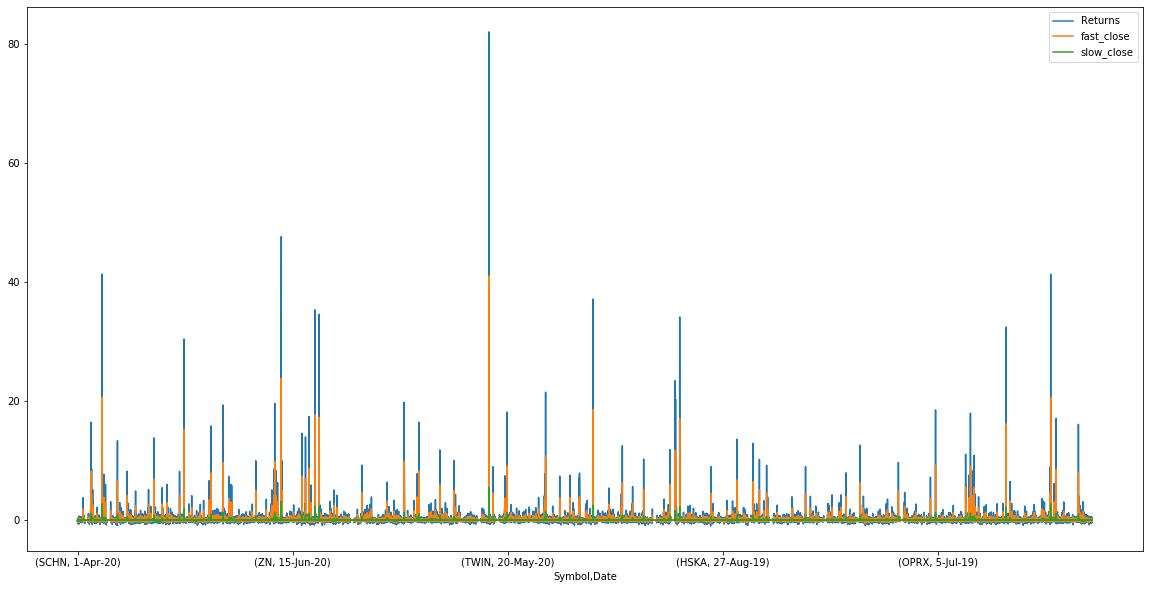

In [122]:
# Plot the EMA of BTC/USD closing prices
nasdaq_2[['Returns', 'fast_close', 'slow_close']].plot(kind='line', figsize=(20,10))

In [123]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
nasdaq_2['fast_vol'] = nasdaq_2['Returns'].ewm(halflife=short_vol_window).std()
nasdaq_2['slow_vol'] = nasdaq_2['Returns'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
nasdaq_2['vol_trend_long'] = np.where(nasdaq_2['fast_vol'] < nasdaq_2['slow_vol'], 1.0, 0.0)
nasdaq_2['vol_trend_short'] = np.where(nasdaq_2['fast_vol'] > nasdaq_2['slow_vol'], -1.0, 0.0) 
nasdaq_2['vol_trend_signal'] = nasdaq_2['vol_trend_long'] + nasdaq_2['vol_trend_short']

nasdaq_2.head()

,,Returns,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal
Symbol,Date,,,,,,,,,,,
SCHN,1-Apr-20,-0.039877,-0.039877,-0.039877,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
FIVN,1-Apr-20,-0.035574,-0.037009,-0.037651,1.0,0.0,1.0,0.003043,0.003043,0.0,-1.0,-1.0
PFBC,1-Apr-20,-0.071851,-0.056919,-0.049850,0.0,-1.0,-1.0,0.022877,0.020191,0.0,-1.0,-1.0
SALM,1-Apr-20,-0.116382,-0.088632,-0.068250,0.0,-1.0,-1.0,0.040480,0.038020,0.0,-1.0,-1.0
JCS,1-Apr-20,-0.044843,-0.066031,-0.062898,0.0,-1.0,-1.0,0.038820,0.034158,0.0,-1.0,-1.0


In [124]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
nasdaq_2['bollinger_mid_band'] = nasdaq_2['Returns'].rolling(window=bollinger_window).mean()
nasdaq_2['bollinger_std'] = nasdaq_2['Returns'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
nasdaq_2['bollinger_upper_band']  = nasdaq_2['bollinger_mid_band'] + (nasdaq_2['bollinger_std'] * 1)
nasdaq_2['bollinger_lower_band']  = nasdaq_2['bollinger_mid_band'] - (nasdaq_2['bollinger_std'] * 1)

# Calculate bollinger band trading signal
nasdaq_2['bollinger_long'] = np.where(nasdaq_2['Returns'] < nasdaq_2['bollinger_lower_band'], 1.0, 0.0)
nasdaq_2['bollinger_short'] = np.where(nasdaq_2['Returns'] > nasdaq_2['bollinger_upper_band'], -1.0, 0.0)
nasdaq_2['bollinger_signal'] = nasdaq_2['bollinger_long'] + nasdaq_2['bollinger_short']

nasdaq_2.head()

,,Returns,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Symbol,Date,,,,,,,,,,,,,,,,,,
SCHN,1-Apr-20,-0.039877,-0.039877,-0.039877,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
FIVN,1-Apr-20,-0.035574,-0.037009,-0.037651,1.0,0.0,1.0,0.003043,0.003043,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
PFBC,1-Apr-20,-0.071851,-0.056919,-0.049850,0.0,-1.0,-1.0,0.022877,0.020191,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
SALM,1-Apr-20,-0.116382,-0.088632,-0.068250,0.0,-1.0,-1.0,0.040480,0.038020,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
JCS,1-Apr-20,-0.044843,-0.066031,-0.062898,0.0,-1.0,-1.0,0.038820,0.034158,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [125]:
# Set x variable list of features
x_var_list = ['crossover_signal', 'vol_trend_signal', 'bollinger_signal']

# Filter by x-variable list
nasdaq_2[x_var_list].head()

,,crossover_signal,vol_trend_signal,bollinger_signal
Symbol,Date,,,
SCHN,1-Apr-20,0.0,0.0,0.0
FIVN,1-Apr-20,1.0,-1.0,0.0
PFBC,1-Apr-20,-1.0,-1.0,0.0
SALM,1-Apr-20,-1.0,-1.0,0.0
JCS,1-Apr-20,-1.0,-1.0,0.0


In [126]:
# Shift DataFrame values by 1
nasdaq_2[x_var_list] = nasdaq_2[x_var_list].shift(1)
nasdaq_2[x_var_list].tail()

,,crossover_signal,vol_trend_signal,bollinger_signal
Symbol,Date,,,
KFRC,9-Sep-19,-1.0,1.0,0.0
WYNN,9-Sep-19,-1.0,1.0,0.0
STOK,9-Sep-19,1.0,1.0,0.0
VTGN,9-Sep-19,-1.0,-1.0,1.0
DOMO,9-Sep-19,-1.0,-1.0,0.0


In [127]:
# Drop NAs and replace positive/negative infinity values
nasdaq_2.dropna(subset=x_var_list, inplace=True)
nasdaq_2.dropna(subset=['Returns'], inplace=True)
nasdaq_2 = nasdaq_2.replace([np.inf, -np.inf], np.nan)
nasdaq_2.head()

,,Returns,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Symbol,Date,,,,,,,,,,,,,,,,,,
FIVN,1-Apr-20,-0.035574,-0.037009,-0.037651,1.0,0.0,0.0,0.003043,0.003043,0.0,-1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
PFBC,1-Apr-20,-0.071851,-0.056919,-0.049850,0.0,-1.0,1.0,0.022877,0.020191,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
SALM,1-Apr-20,-0.116382,-0.088632,-0.068250,0.0,-1.0,-1.0,0.040480,0.038020,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
JCS,1-Apr-20,-0.044843,-0.066031,-0.062898,0.0,-1.0,-1.0,0.038820,0.034158,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
CIVB,1-Apr-20,-0.086898,-0.076630,-0.067622,0.0,-1.0,-1.0,0.029917,0.031774,1.0,0.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [159]:
# Construct the dependent variable where if daily return is greater than 0, then 1, else, 0.
# Changing the target variable away from 0 introduces the problem of an imbalanced dataset
#nasdaq_2['Positive Return'] = np.where(nasdaq_2['Returns'] > 0, 1.0, 0.0)
nasdaq_2.dropna(inplace=True)

In [160]:
nasdaq_3 = nasdaq_2.copy()
len(nasdaq_3)

942985

In [161]:
target_list = []
stoprw = len(nasdaq_3)
for rw in range(0,stoprw):
    if rw != stoprw:
        rwn = rw + 1 
        if nasdaq_3['Returns'][rwn]> 0.02:
            target_list.append(1)
        else:
            target_list.append(0)
    else: 
        print("hit!")
        target_list.append(0)
        
nasdaq_3['Target'] = target_list

IndexError: index out of bounds

In [162]:
len(target_list)

942984

In [163]:
len(nasdaq_3)

942985

In [164]:
target_list.append(0)

In [165]:
nasdaq_3['Target'] = target_list

In [ ]:
nasdaq_4 = nasdaq_3.drop(['Returns','Positive Return'], axis=1)
nasdaq_4.head()

In [136]:
nasdaq_4.max()

fast_close              40.974025
slow_close               5.488104
crossover_long           1.000000
crossover_short          0.000000
crossover_signal         1.000000
fast_vol                50.179894
slow_vol                20.847752
vol_trend_long           1.000000
vol_trend_short          0.000000
vol_trend_signal         1.000000
bollinger_mid_band       4.101838
bollinger_std           18.323982
bollinger_upper_band    22.424433
bollinger_lower_band     0.050527
bollinger_long           1.000000
bollinger_short          0.000000
bollinger_signal         1.000000
Positive Return          1.000000
Target                   1.000000
dtype: float64

In [137]:
nasdaq_4.min()

fast_close             -6.010646e-01
slow_close             -1.913387e-01
crossover_long          0.000000e+00
crossover_short        -1.000000e+00
crossover_signal       -1.000000e+00
fast_vol                0.000000e+00
slow_vol                8.036743e-54
vol_trend_long          0.000000e+00
vol_trend_short        -1.000000e+00
vol_trend_signal       -1.000000e+00
bollinger_mid_band     -2.253245e-01
bollinger_std           0.000000e+00
bollinger_upper_band   -9.660491e-02
bollinger_lower_band   -1.422802e+01
bollinger_long          0.000000e+00
bollinger_short        -1.000000e+00
bollinger_signal       -1.000000e+00
Positive Return         0.000000e+00
Target                  0.000000e+00
dtype: float64

In [138]:
nv = ['fast_close', 'slow_close', 'fast_vol','slow_vol', 'bollinger_mid_band', 'bollinger_std', 'bollinger_upper_band']


In [139]:
nas = nasdaq_4.copy()
stdrd = nasdaq_4[nv]
#standardizing using min max scaler
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler()
x_unstdrd = stdrd.values
x_stdrd = minmax.fit_transform(x_unstdrd)
nas[nv] = x_stdrd

In [140]:
# # Construct training start and end dates
# training_start = '2019-Jun-01'
# training_end = '2019-Apr-29'
# # Construct testing start and end dates
# testing_start =  '2020-Apr-30'
# testing_end = '2020-Jul-24'
# # Print training and testing start/end dates
# print(f"Training Start: {training_start}")
# print(f"Training End: {training_end}")
# print(f"Testing Start: {testing_start}")
# print(f"Testing End: {testing_end}")

Training Start: 2019-Jun-01
Training End: 2019-Apr-29
Testing Start: 2020-Apr-30
Testing End: 2020-Jul-24


In [141]:
X = nas.drop(['Target', 'Positive Return'], axis=1)
y = nas['Target']

In [142]:
X.columns

Index(['fast_close', 'slow_close', 'crossover_long', 'crossover_short',
       'crossover_signal', 'fast_vol', 'slow_vol', 'vol_trend_long',
       'vol_trend_short', 'vol_trend_signal', 'bollinger_mid_band',
       'bollinger_std', 'bollinger_upper_band', 'bollinger_lower_band',
       'bollinger_long', 'bollinger_short', 'bollinger_signal'],
      dtype='object')

In [143]:
y

Symbol  Date    
FIVN    1-Apr-20    0
PFBC    1-Apr-20    0
SALM    1-Apr-20    0
JCS     1-Apr-20    0
CIVB    1-Apr-20    0
                   ..
KFRC    9-Sep-19    1
WYNN    9-Sep-19    0
STOK    9-Sep-19    1
VTGN    9-Sep-19    0
DOMO    9-Sep-19    0
Name: Target, Length: 943003, dtype: int64

In [144]:
tst = nas[nas['Target']== 1]
len(tst)

178971

In [145]:
# Construct the X_train and y_train datasets
X_train = X.iloc[0:660102]
y_train = y.iloc[0:660102]

X_train


,,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Symbol,Date,,,,,,,,,,,,,,,,,
FIVN,1-Apr-20,0.013567,0.027060,1.0,0.0,0.0,0.000061,0.000146,0.0,-1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
PFBC,1-Apr-20,0.013088,0.024912,0.0,-1.0,1.0,0.000456,0.000969,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
SALM,1-Apr-20,0.012325,0.021673,0.0,-1.0,-1.0,0.000807,0.001824,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
JCS,1-Apr-20,0.012869,0.022615,0.0,-1.0,-1.0,0.000774,0.001638,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
CIVB,1-Apr-20,0.012614,0.021783,0.0,-1.0,-1.0,0.000596,0.001524,1.0,0.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DISCA,29-Jul-19,0.014319,0.032375,1.0,0.0,1.0,0.000218,0.001256,1.0,0.0,1.0,0.051052,0.001298,0.005150,-0.028206,0.0,0.0,0.0
RTRX,29-Jul-19,0.013947,0.032031,0.0,-1.0,1.0,0.000408,0.001265,1.0,0.0,1.0,0.050319,0.001291,0.005003,-0.031236,1.0,0.0,0.0
GXGXW,29-Jul-19,0.012999,0.030963,0.0,-1.0,-1.0,0.001004,0.001647,0.0,-1.0,1.0,0.048992,0.001680,0.005065,-0.044112,1.0,0.0,1.0


In [146]:
y_train.tail()

Symbol  Date     
DISCA   29-Jul-19    0
RTRX    29-Jul-19    0
GXGXW   29-Jul-19    1
ELTK    29-Jul-19    0
CETX    29-Jul-19    1
Name: Target, dtype: int64

In [147]:
X_test = X.iloc[660103:]
y_test = y.iloc[660103:]

X_test.tail()

,,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Symbol,Date,,,,,,,,,,,,,,,,,
KFRC,9-Sep-19,0.014561,0.035843,0.0,-1.0,-1.0,0.000451,0.001937,1.0,0.0,1.0,0.054647,0.002363,0.006707,-0.032165,0.0,0.0,0.0
WYNN,9-Sep-19,0.014856,0.036039,1.0,0.0,-1.0,0.000437,0.001882,1.0,0.0,1.0,0.055860,0.002086,0.006715,-0.021840,0.0,0.0,0.0
STOK,9-Sep-19,0.013956,0.035195,0.0,-1.0,1.0,0.000964,0.002017,0.0,-1.0,1.0,0.055257,0.002264,0.006744,-0.027700,1.0,0.0,0.0
VTGN,9-Sep-19,0.014473,0.035355,0.0,-1.0,-1.0,0.000860,0.001955,0.0,-1.0,-1.0,0.055474,0.002262,0.006784,-0.026727,0.0,0.0,1.0
DOMO,9-Sep-19,0.014602,0.035378,0.0,-1.0,-1.0,0.000622,0.001889,1.0,0.0,-1.0,0.055606,0.002255,0.006803,-0.026020,0.0,0.0,0.0


In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [149]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Make a prediction of "y" values from the X_test dataset
predictions = model.predict(X_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = predictions
Results

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(Results['Target'], Results['Predicted Value'])

In [ ]:
print(classification_report(Results['Target'], Results['Predicted Value']))